In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [79]:
data = pd.read_csv("2016_Building_Energy_Benchmarking.csv")
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [81]:
data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [82]:
#data.isna().sum()

In [83]:
data = data[(data["BuildingType"] != "Multifamily LR (1-4)")&
    (data["BuildingType"] != "Multifamily MR (5-9)")&(data["BuildingType"] != "Multifamily HR (10+)")&
    (data["Outlier"] != "Low outlier")&(data["Outlier"] != "High outlier")]
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


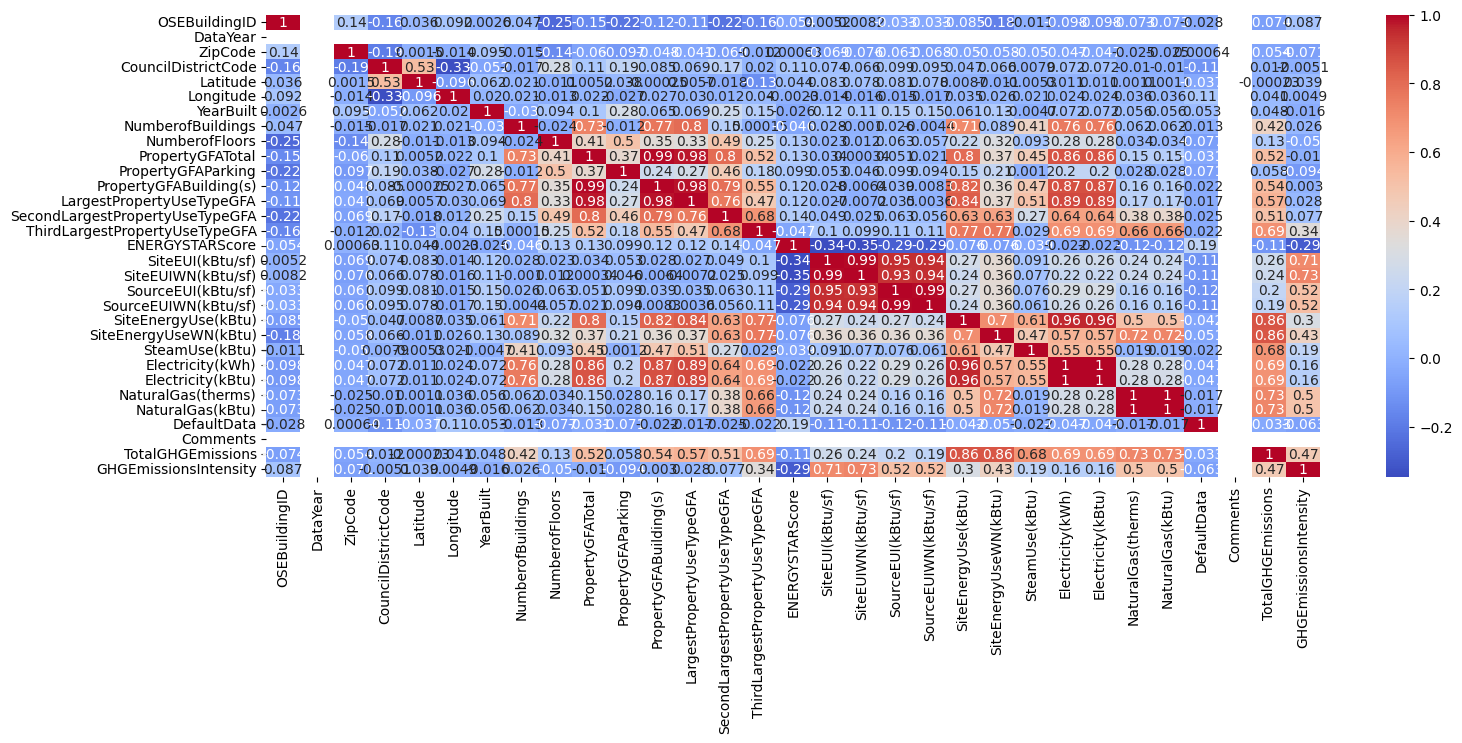

In [84]:
plt.figure(figsize=(17, 6))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [85]:
df = data.drop(["OSEBuildingID", "PropertyName" , "Address" , "City", "State",
                "ZipCode", "ListOfAllPropertyUseTypes", "Comments", "CouncilDistrictCode","NumberofBuildings",
                "YearsENERGYSTARCertified", "SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)", "SourceEUI(kBtu/sf)",
                "SourceEUIWN(kBtu/sf)", "Electricity(kWh)", "Electricity(kBtu)", "NaturalGas(therms)",
                "NaturalGas(kBtu)","TaxParcelIdentificationNumber","DefaultData", "ComplianceStatus"] ,axis=1)
df.head()

,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,2016,NonResidential,Hotel,DOWNTOWN,47.61220,-122.33799,1927,12,88434,0,...,NaN,NaN,NaN,60.0,7226362.5,7456910.0,2003882.00,NaN,249.98,2.83
1,2016,NonResidential,Hotel,DOWNTOWN,47.61317,-122.33393,1996,11,103566,15064,...,15064.0,Restaurant,4622.0,61.0,8387933.0,8664479.0,0.00,NaN,295.86,2.86
2,2016,NonResidential,Hotel,DOWNTOWN,47.61393,-122.33810,1969,41,956110,196718,...,NaN,NaN,NaN,43.0,72587024.0,73937112.0,21566554.00,NaN,2089.28,2.19
3,2016,NonResidential,Hotel,DOWNTOWN,47.61412,-122.33664,1926,10,61320,0,...,NaN,NaN,NaN,56.0,6794584.0,6946800.5,2214446.25,NaN,286.43,4.67
4,2016,NonResidential,Hotel,DOWNTOWN,47.61375,-122.34047,1980,18,175580,62000,...,68009.0,Swimming Pool,0.0,75.0,14172606.0,14656503.0,0.00,NaN,505.01,2.88


<Axes: xlabel='SiteEnergyUse(kBtu)', ylabel='Count'>

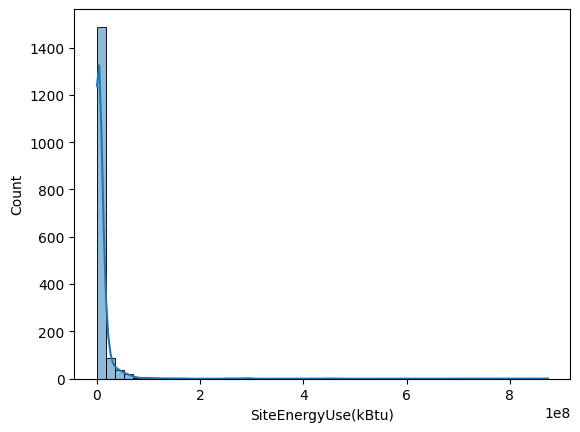

In [86]:
sns.histplot(df['SiteEnergyUse(kBtu)'], bins=50, kde=True)

La distribution de la consommation énergétique est fortement asymétrique, indiquant la présence de bâtiments à très forte consommation. Une transformation logarithmique sera appliquée pour stabiliser la variance.

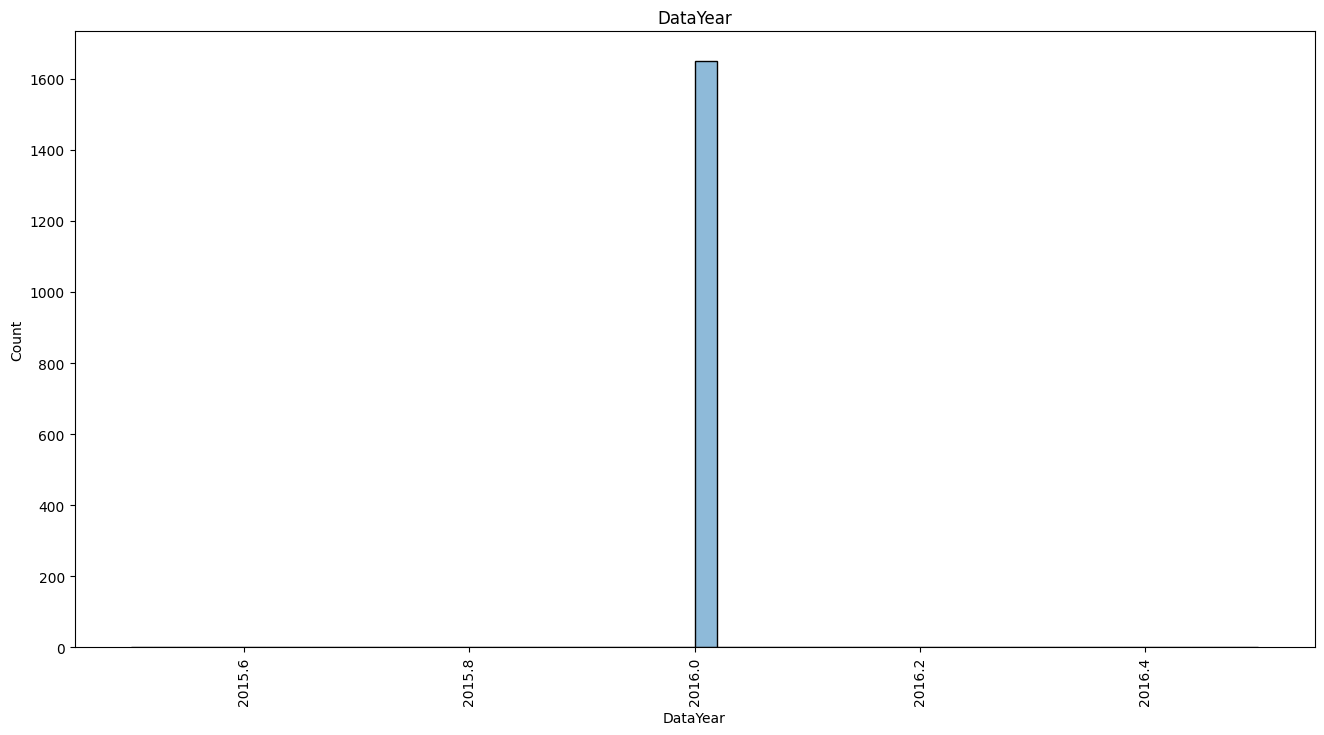

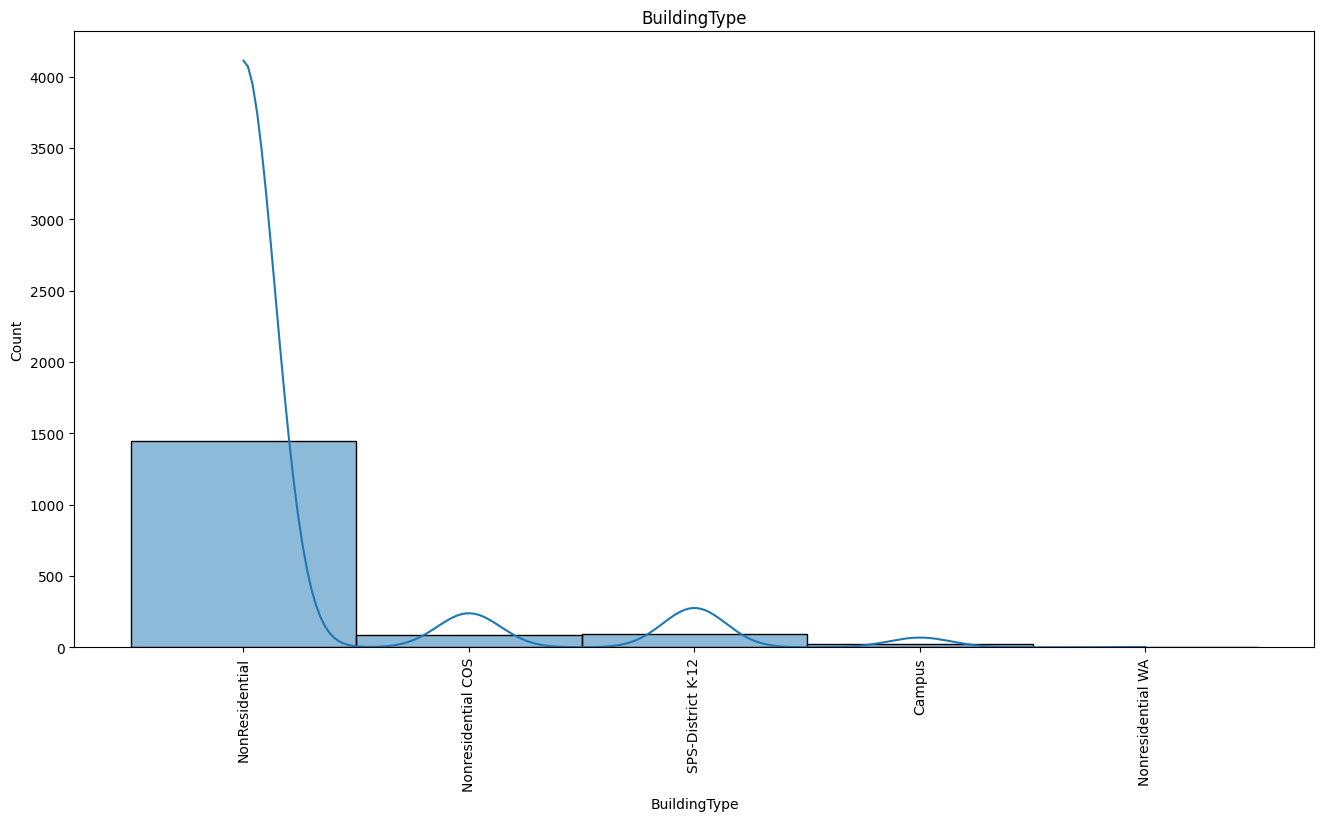

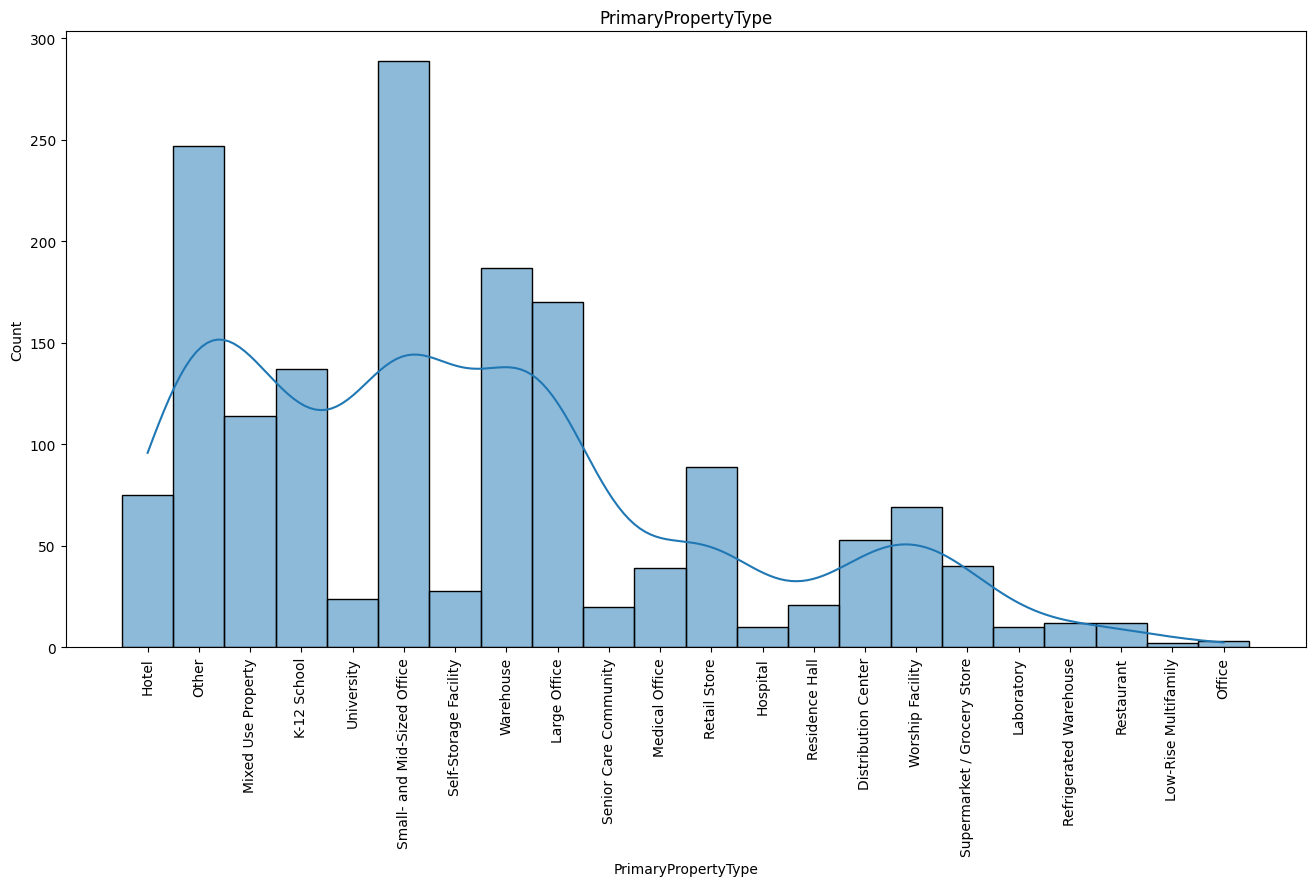

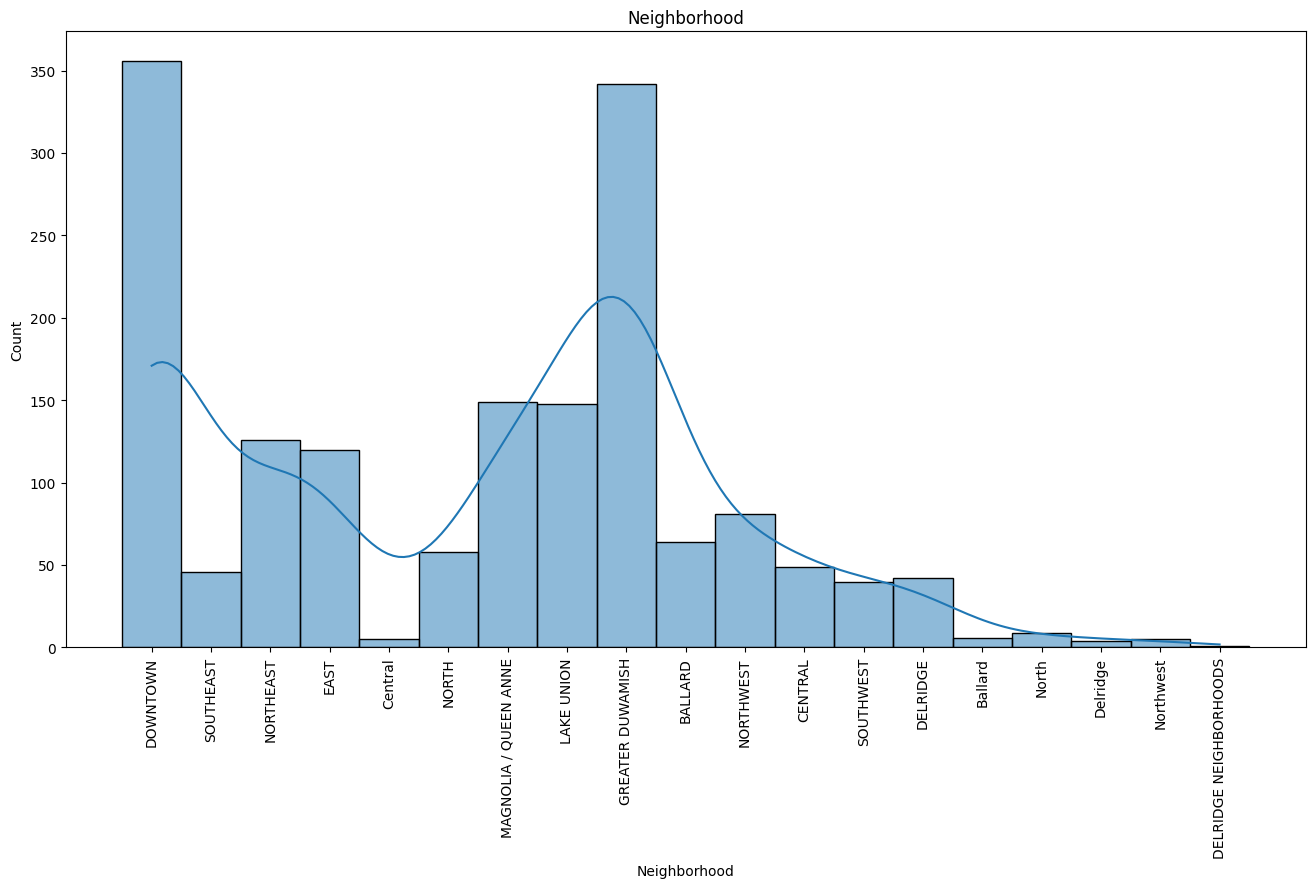

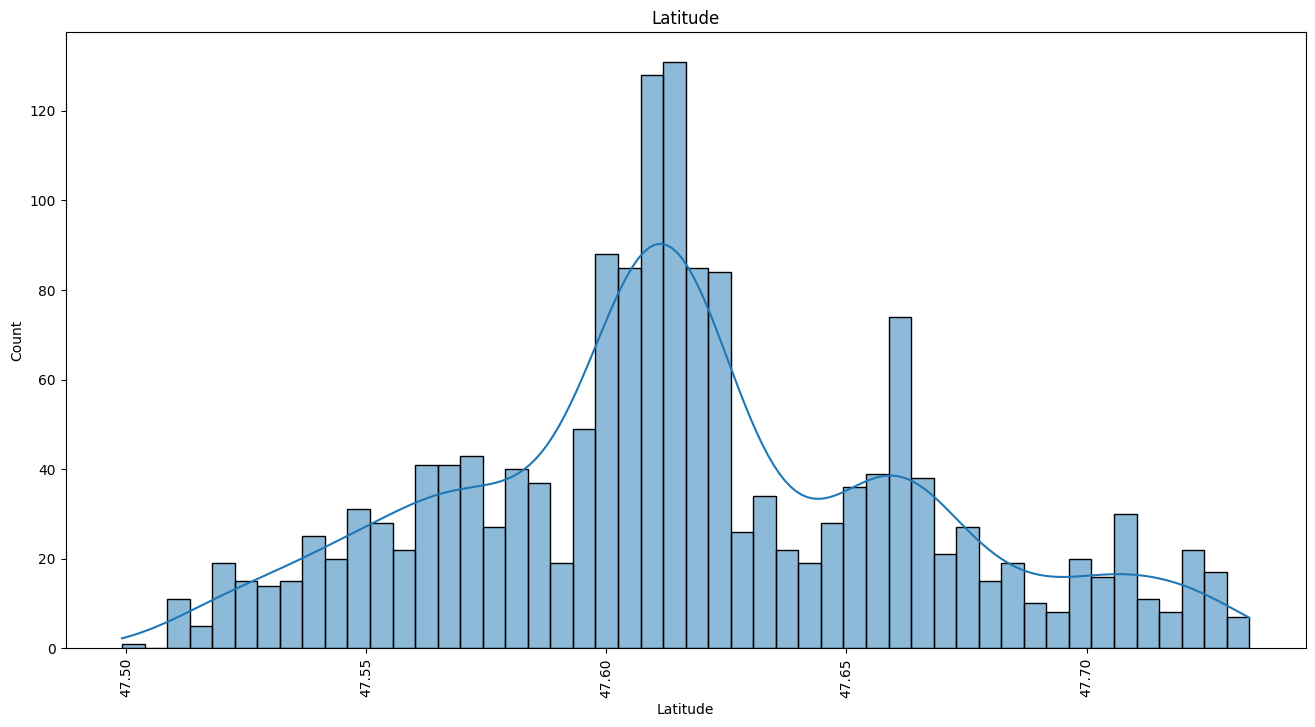

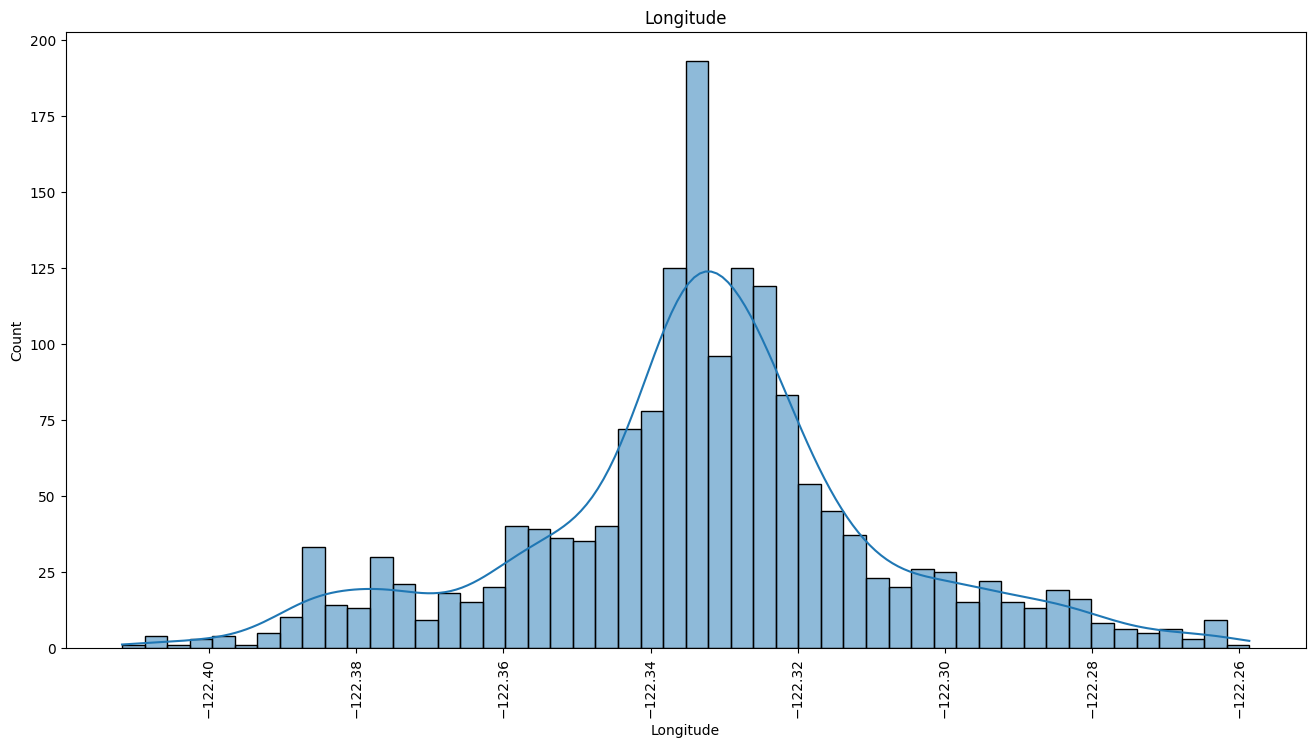

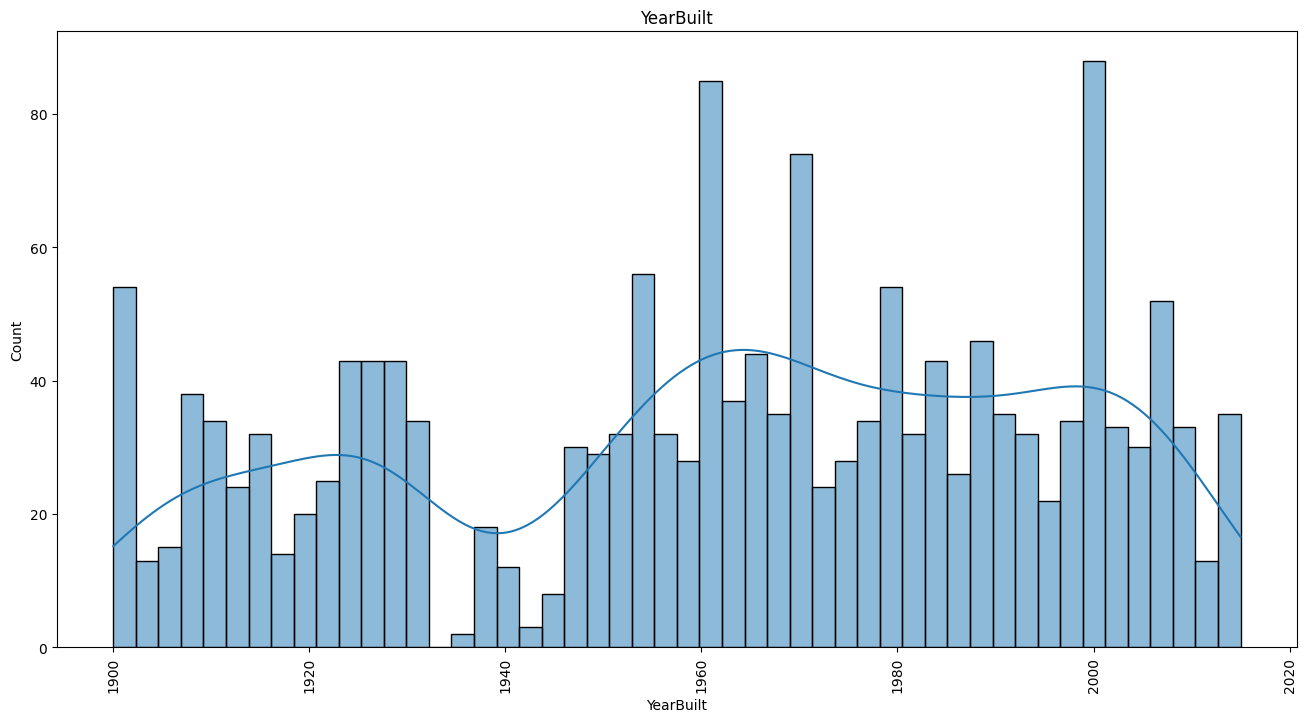

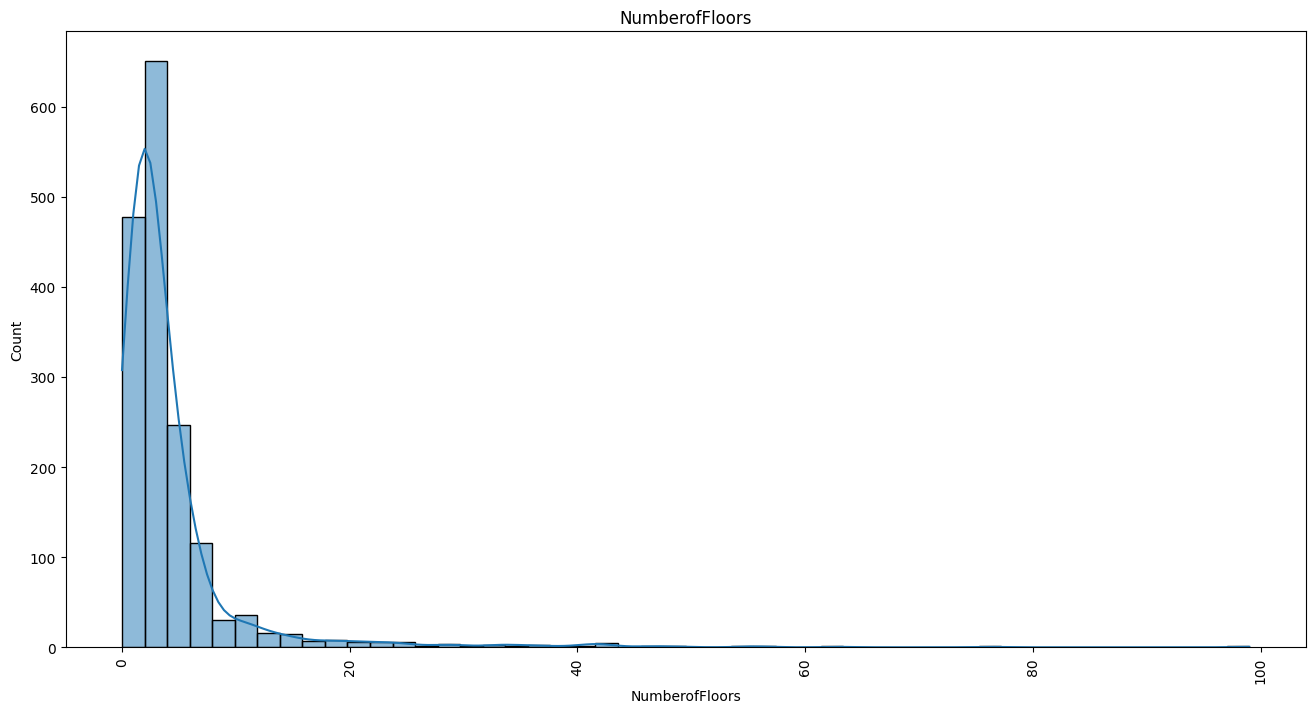

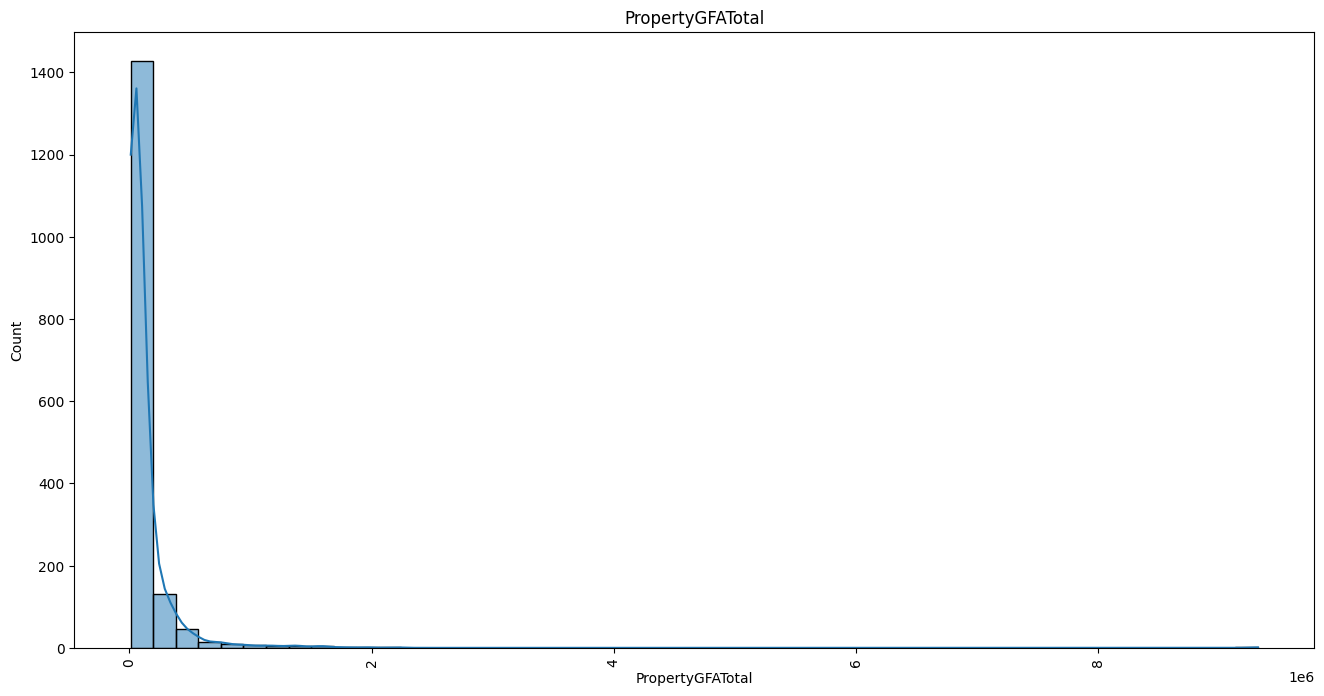

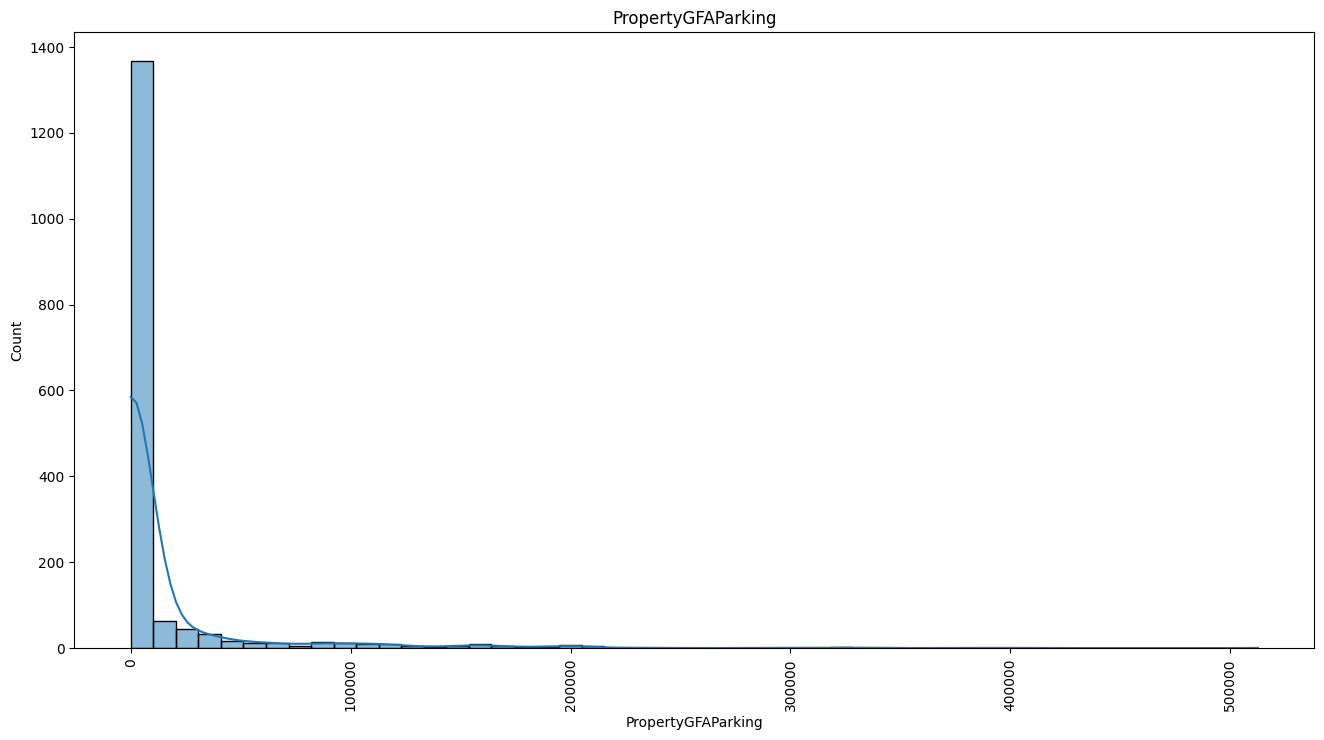

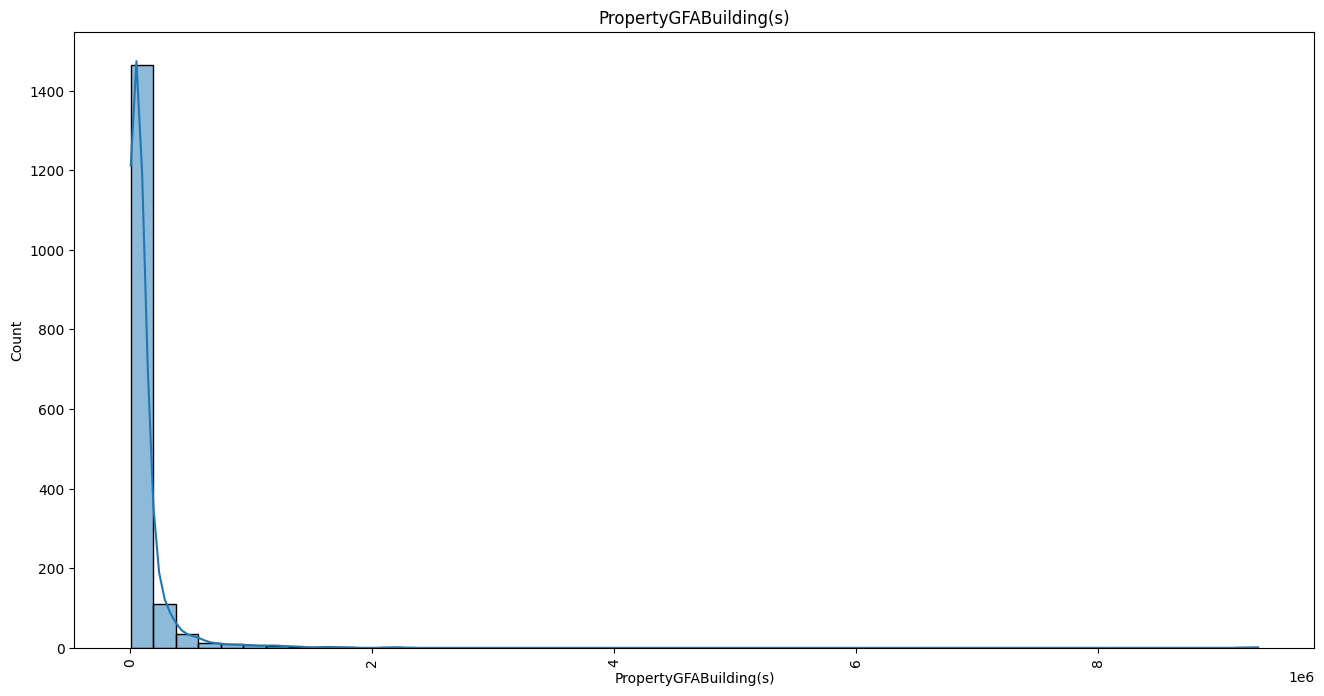

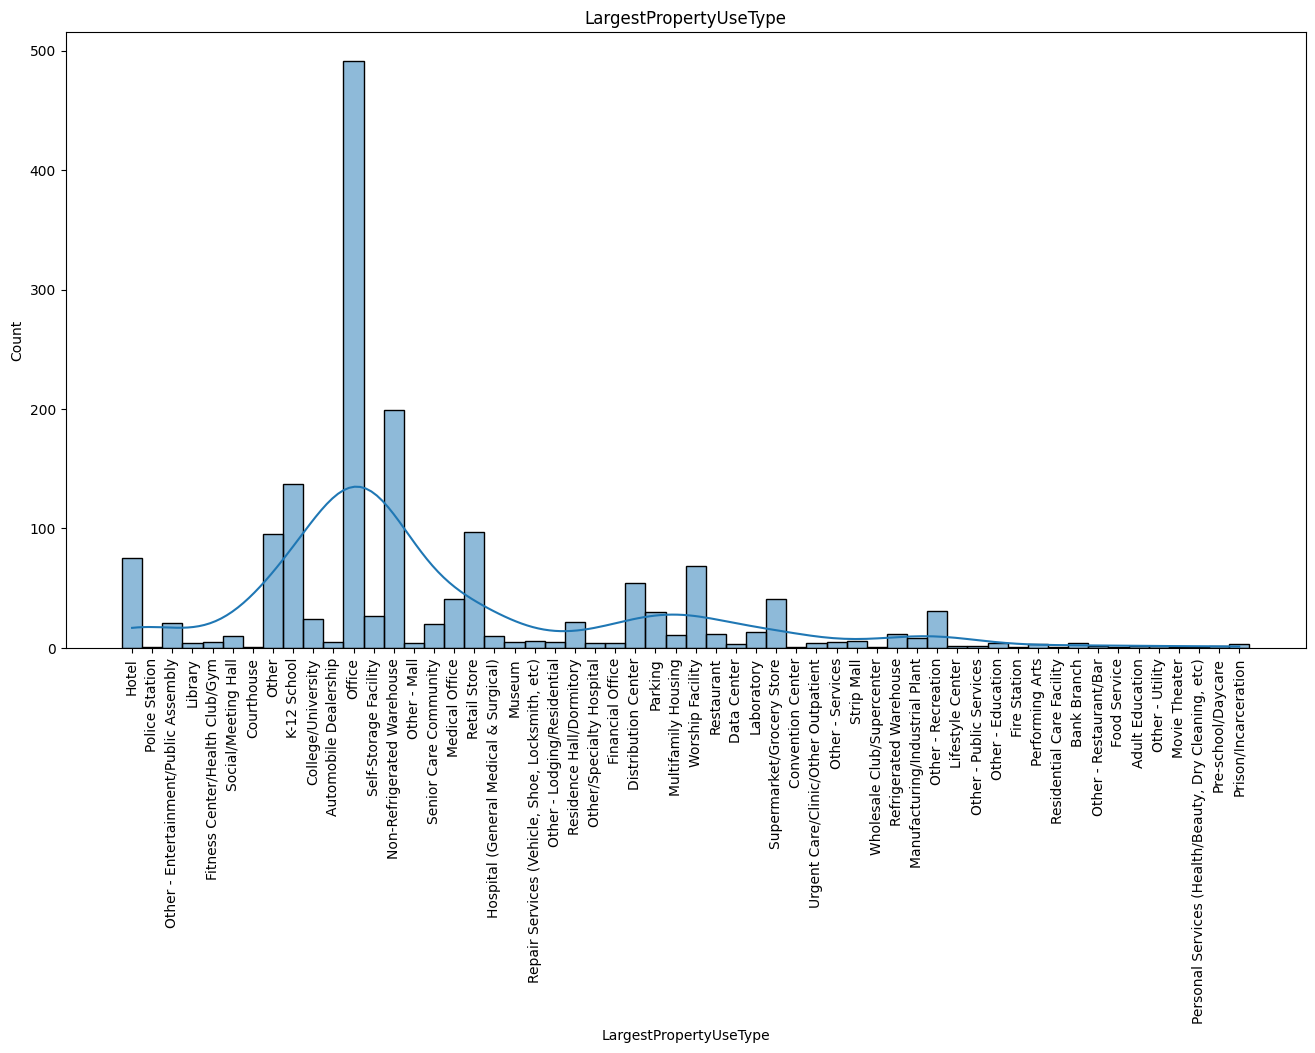

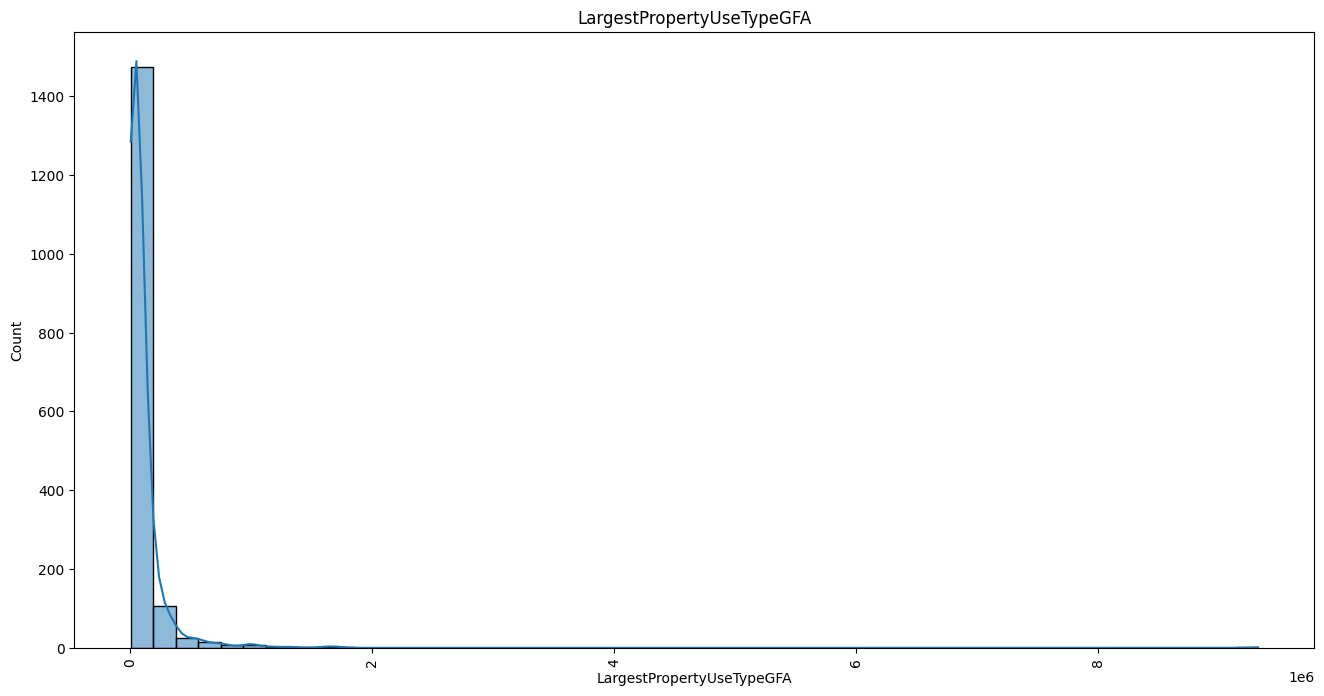

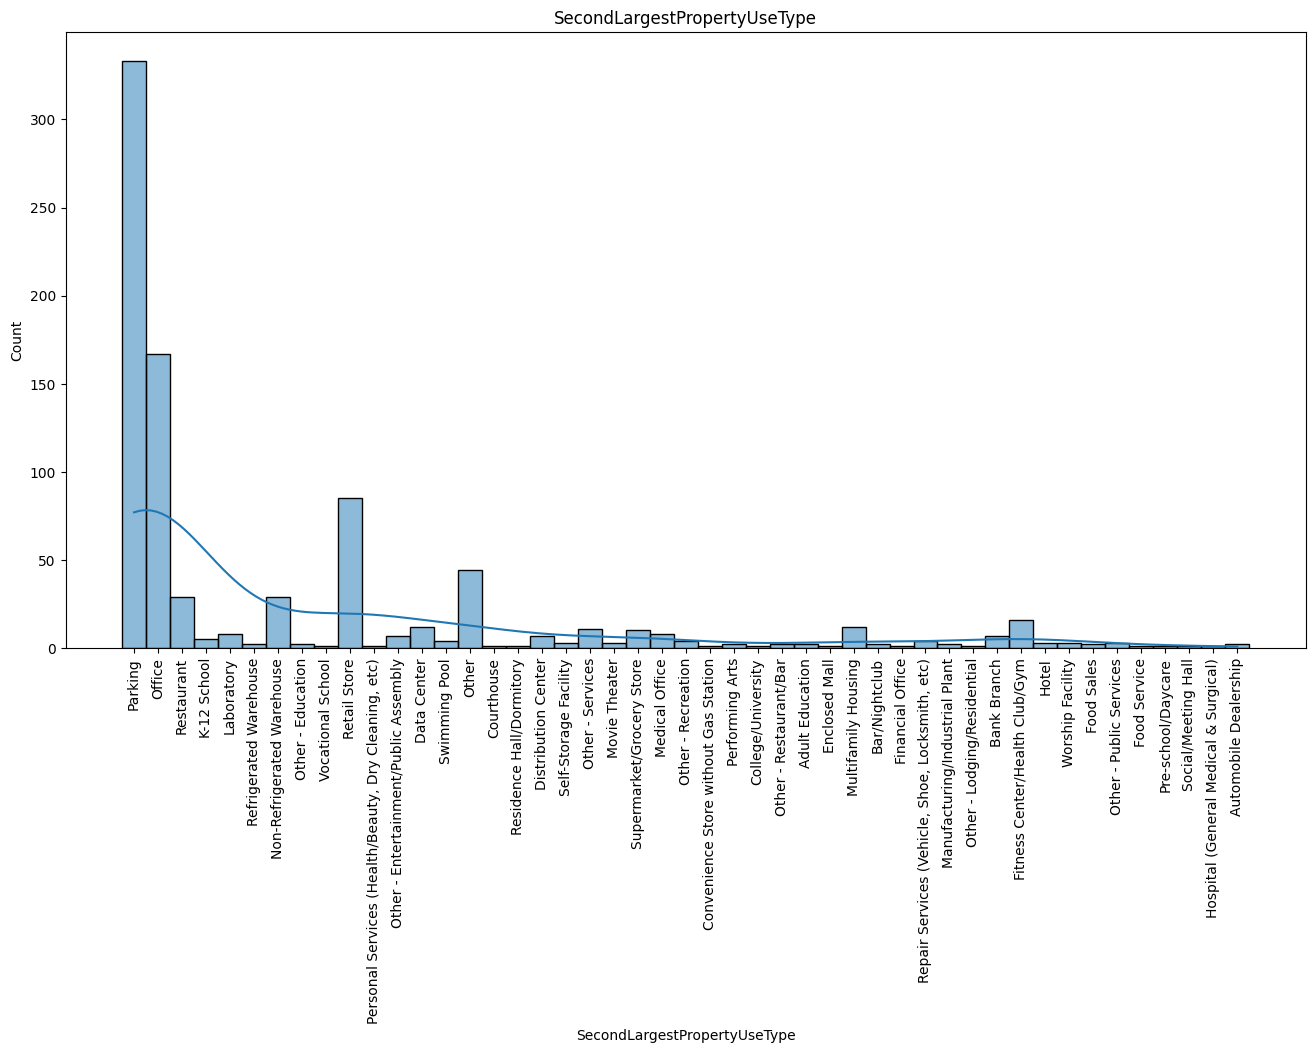

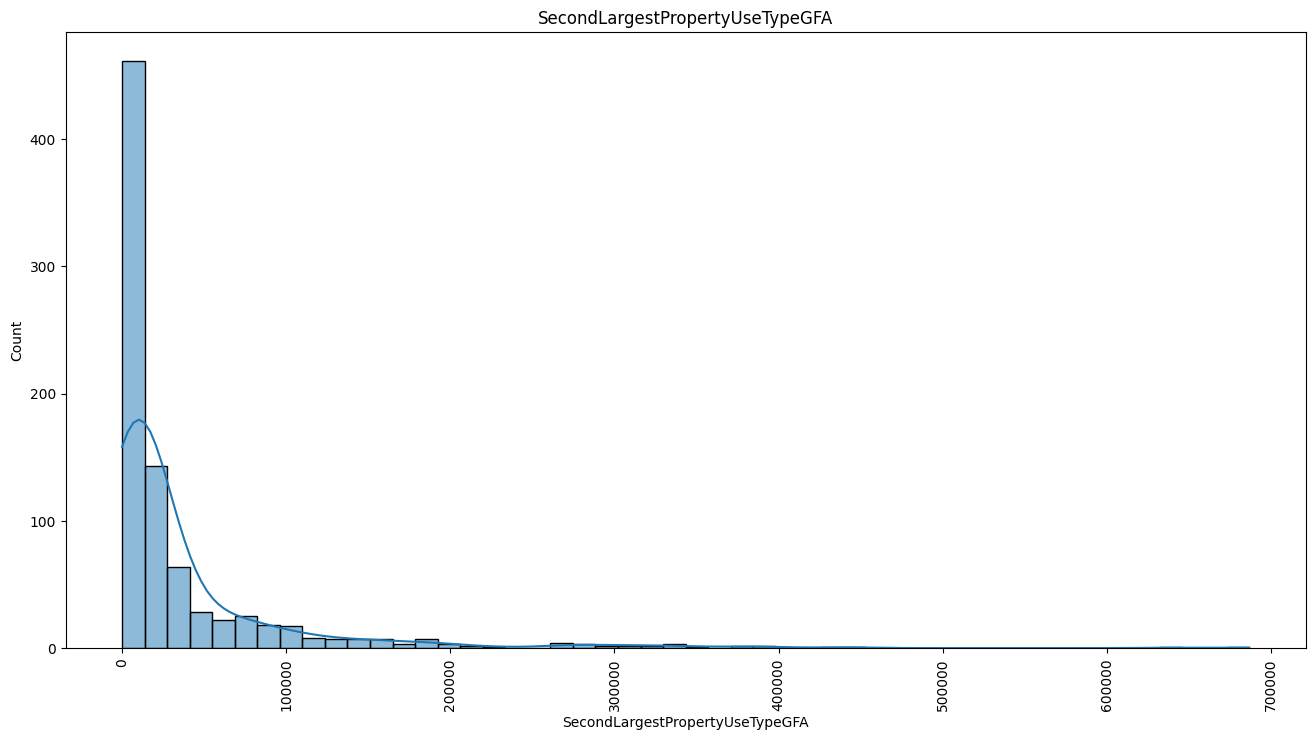

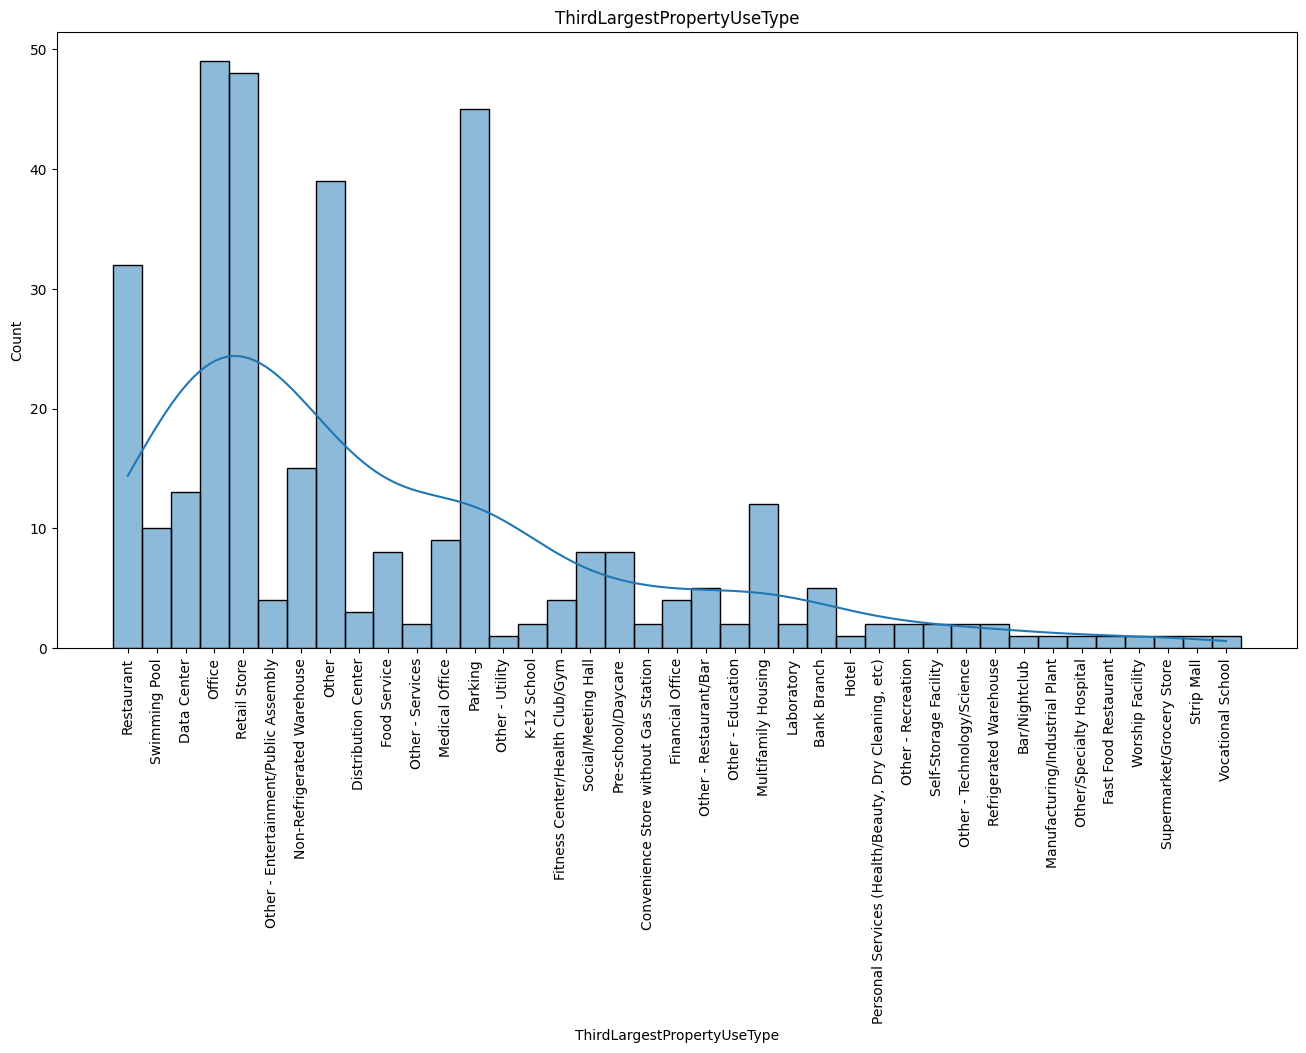

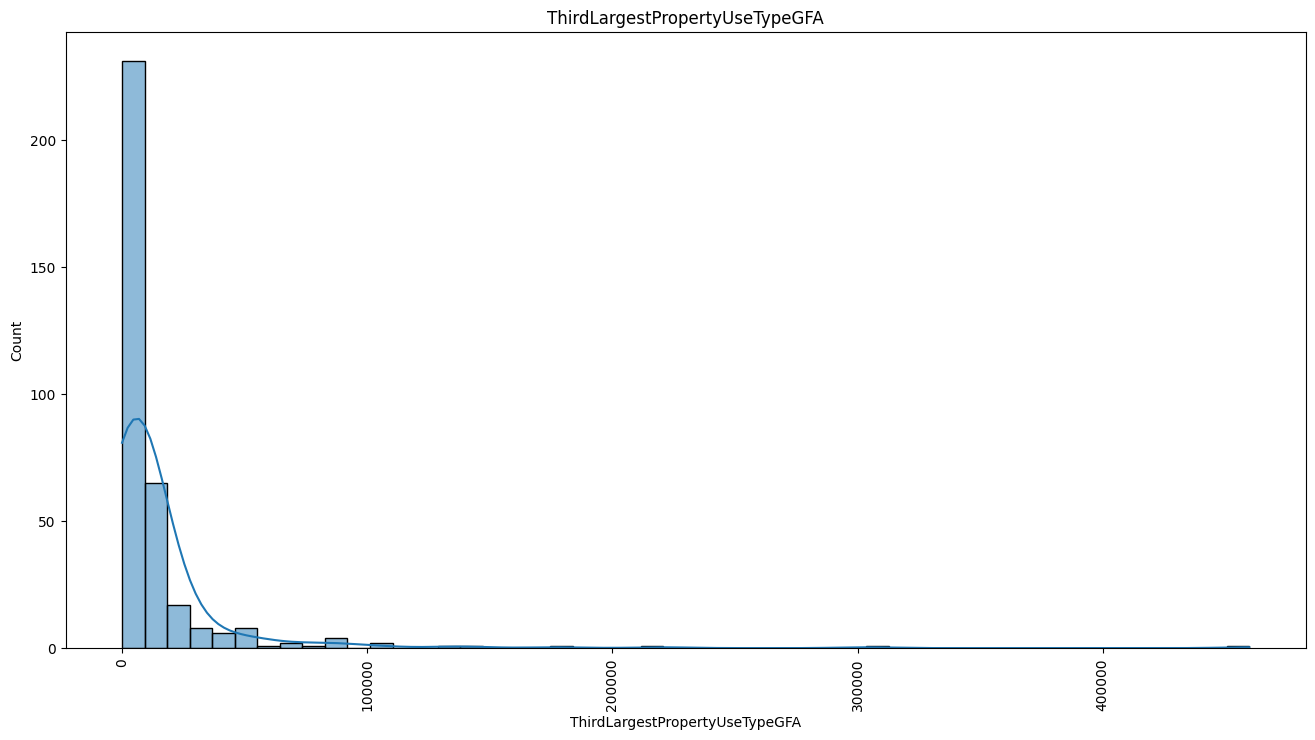

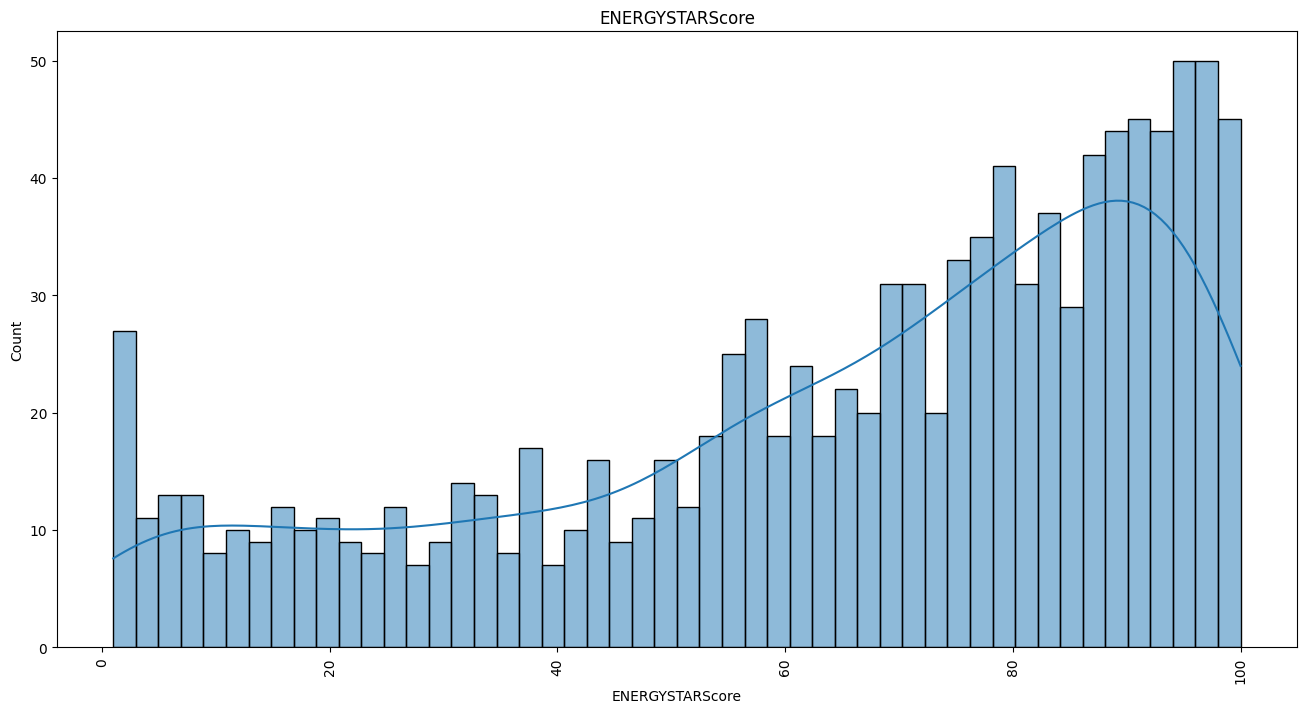

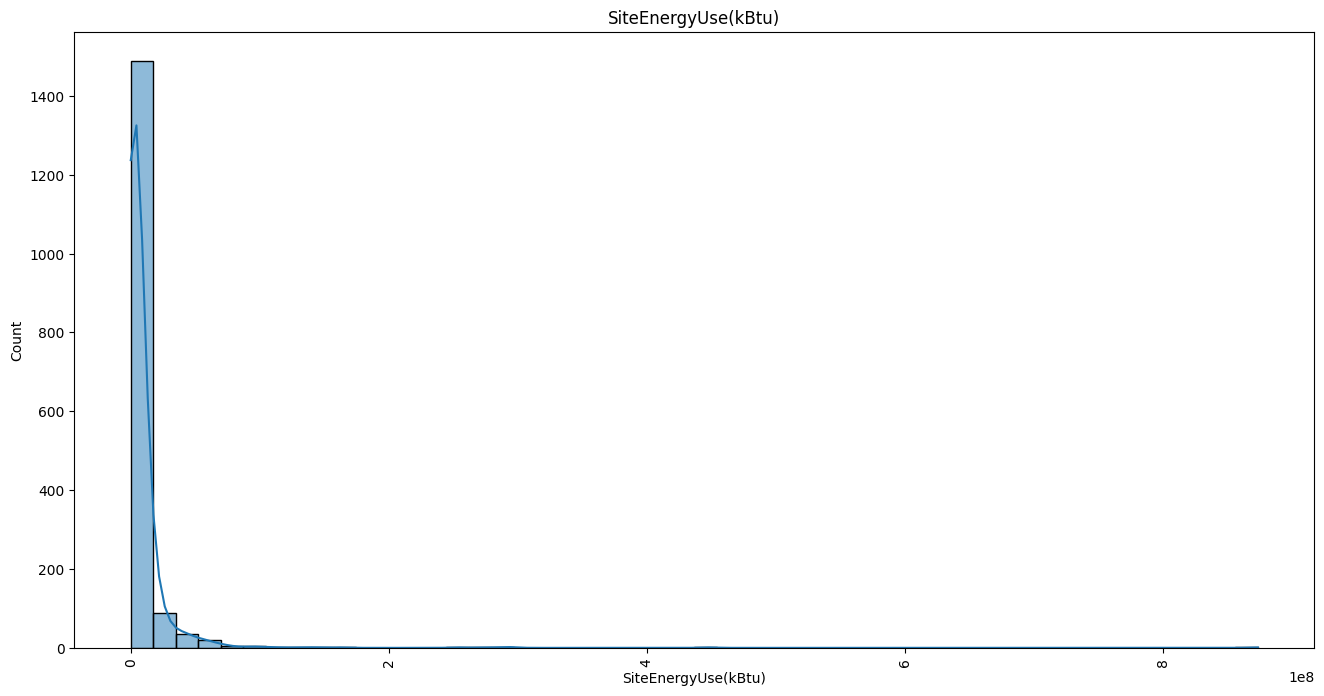

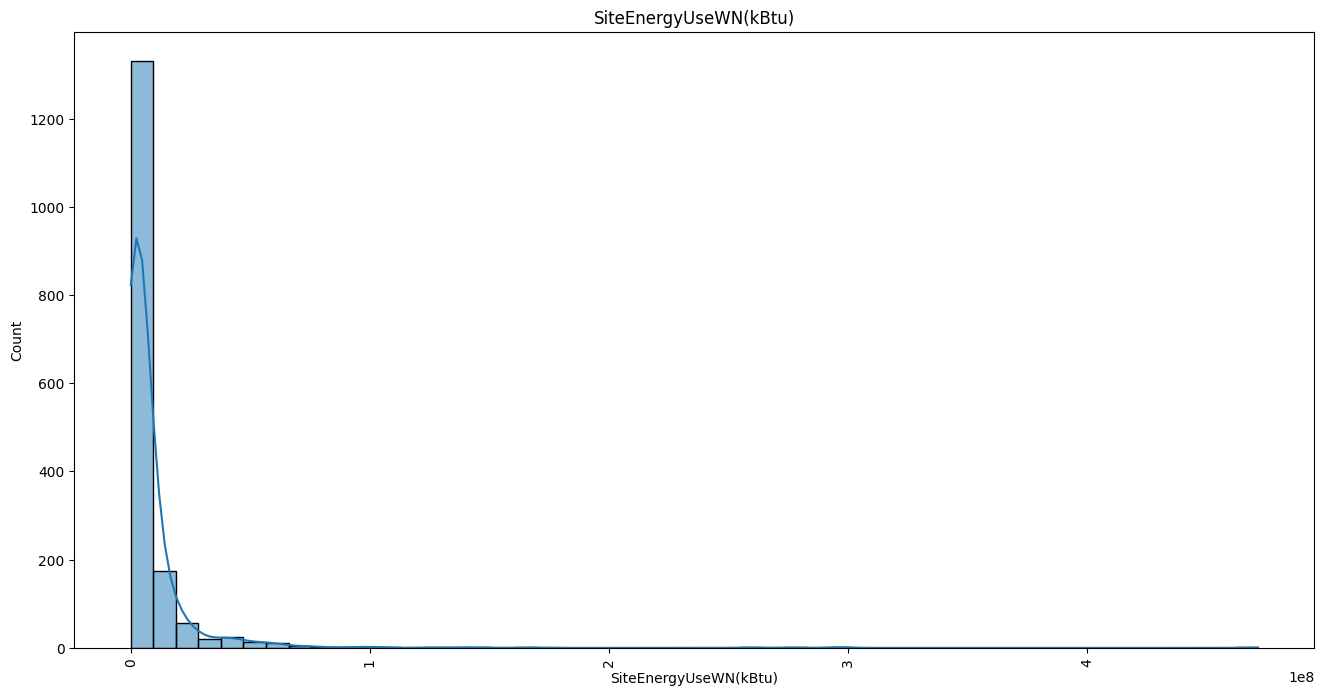

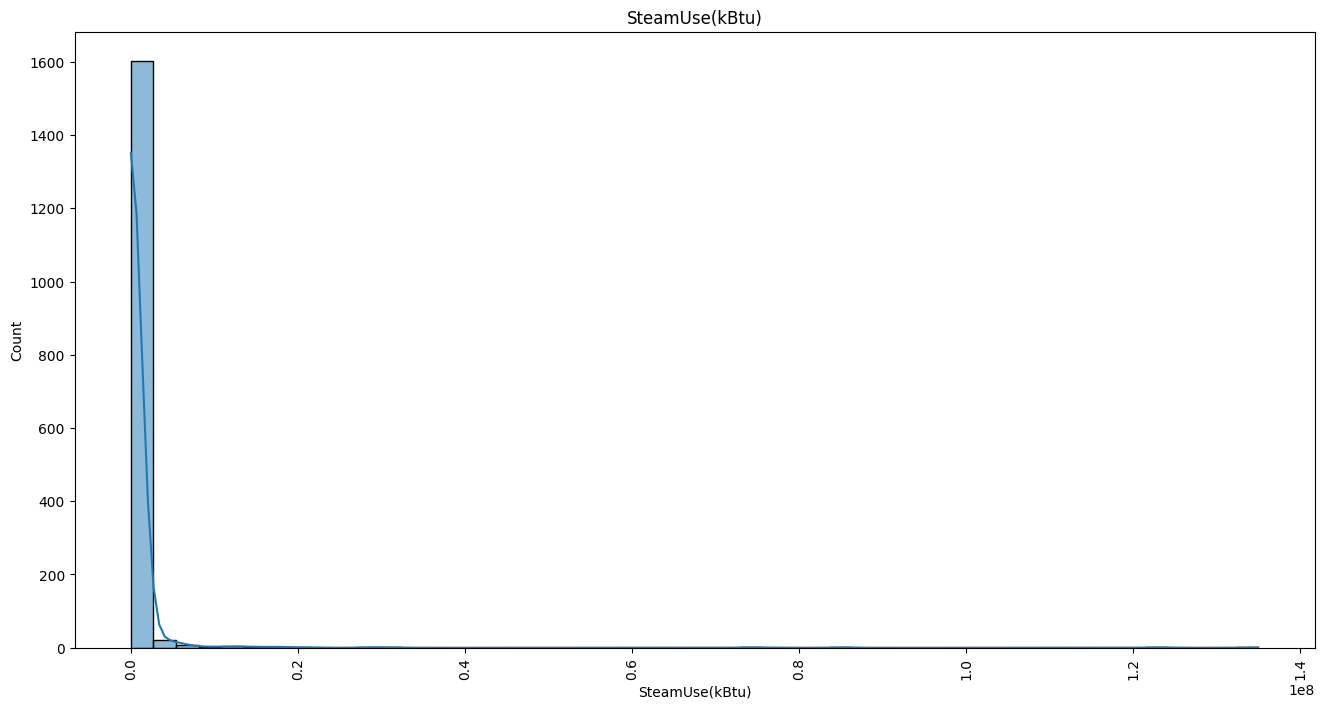

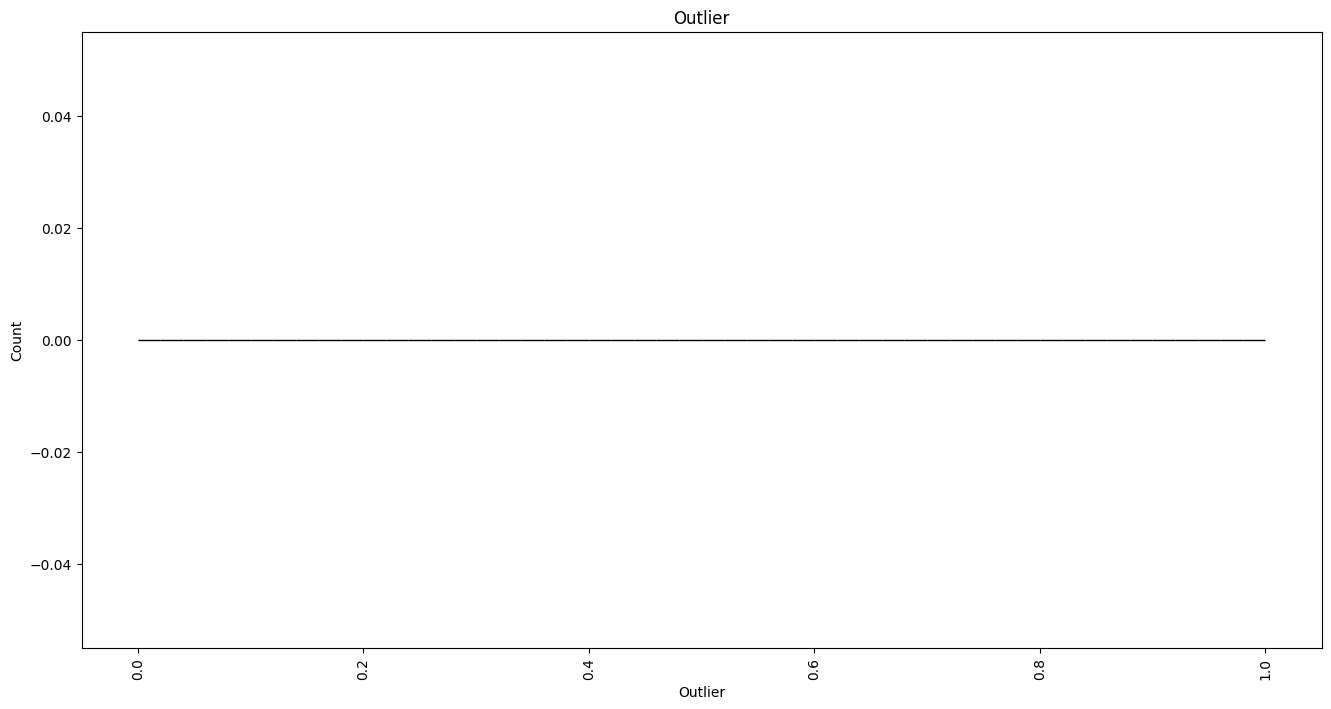

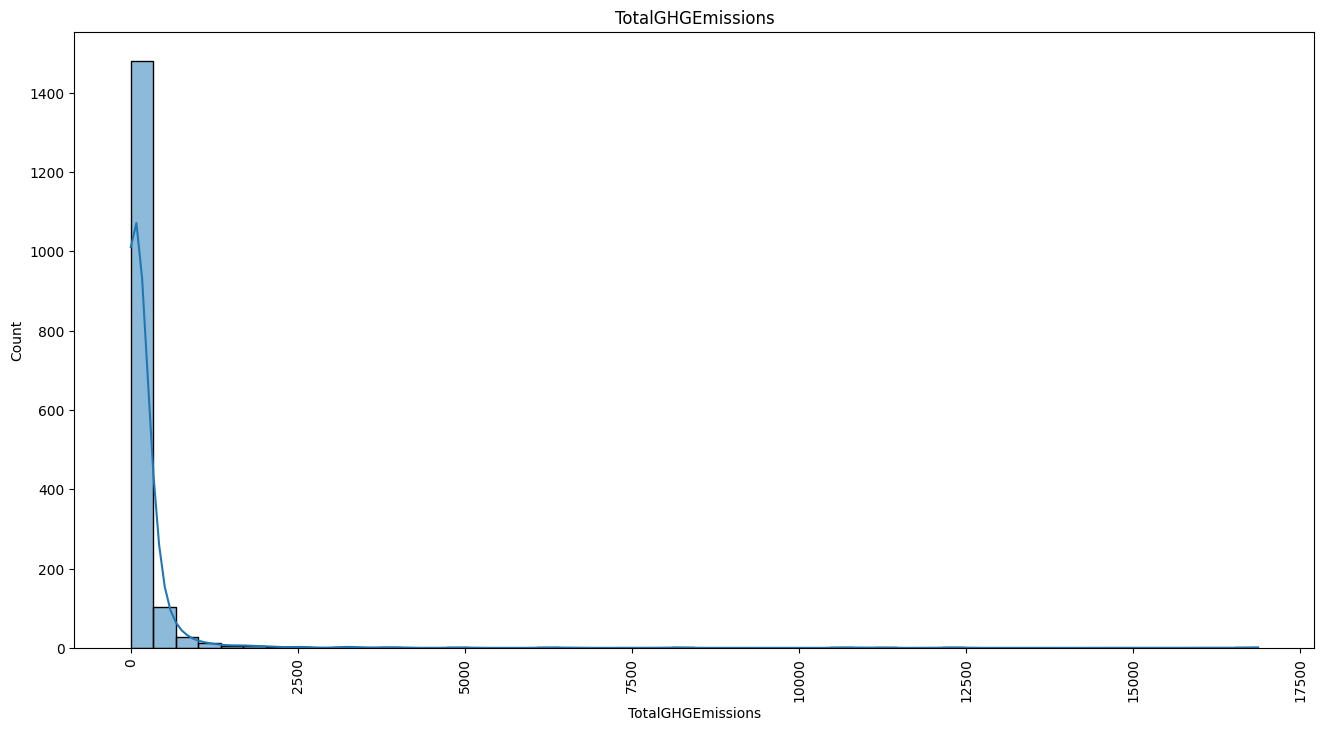

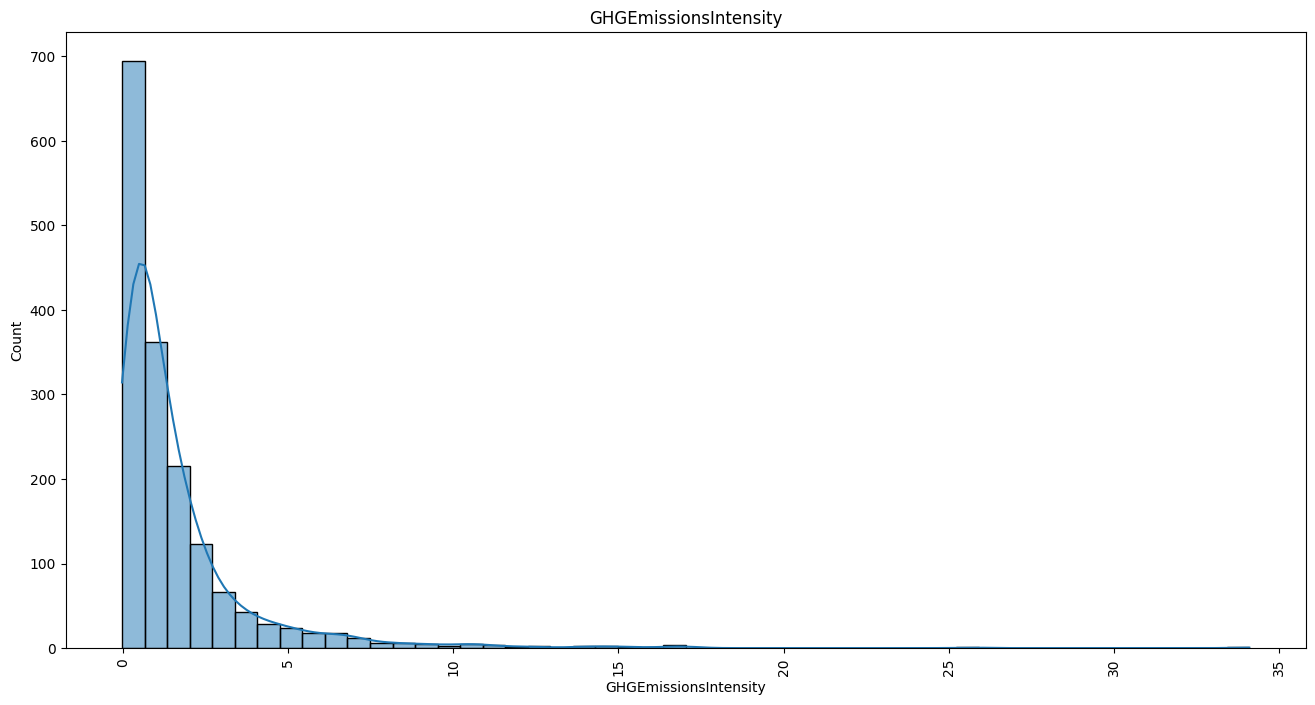

In [87]:
for col in df.columns :
    plt.figure(figsize=(16,8))
    sns.histplot(df[col], bins=50, kde=True)
    plt.xticks(rotation=90)
    plt.title(col)
    plt.show()

In [88]:
df.skew(numeric_only=True)

DataYear                            0.000000
Latitude                            0.224905
Longitude                          -0.077513
YearBuilt                          -0.297669
NumberofFloors                      6.017033
PropertyGFATotal                   19.071492
PropertyGFAParking                  5.199523
PropertyGFABuilding(s)             21.554805
LargestPropertyUseTypeGFA          23.176584
SecondLargestPropertyUseTypeGFA     4.129593
ThirdLargestPropertyUseTypeGFA      7.580658
ENERGYSTARScore                    -0.771256
SiteEnergyUse(kBtu)                17.993867
SiteEnergyUseWN(kBtu)              11.288276
SteamUse(kBtu)                     19.042119
TotalGHGEmissions                  14.147099
GHGEmissionsIntensity               4.693316
dtype: float64

<Axes: xlabel='PropertyGFATotal', ylabel='SiteEnergyUse(kBtu)'>

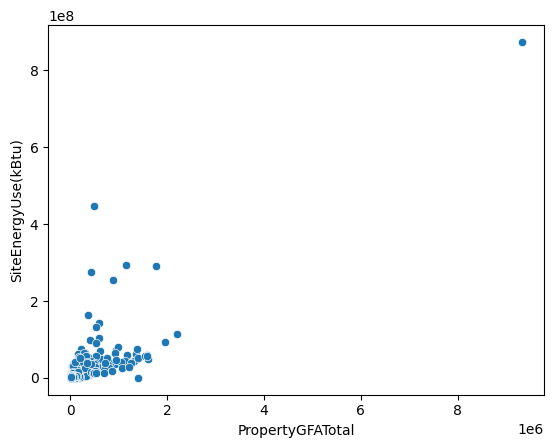

In [89]:
sns.scatterplot(x=df['PropertyGFATotal'], y=df['SiteEnergyUse(kBtu)'])

On observe une relation croissante non linéaire entre la surface totale et la consommation énergétique.

<Axes: xlabel='PropertyGFATotal', ylabel='SiteEnergyUse(kBtu)'>

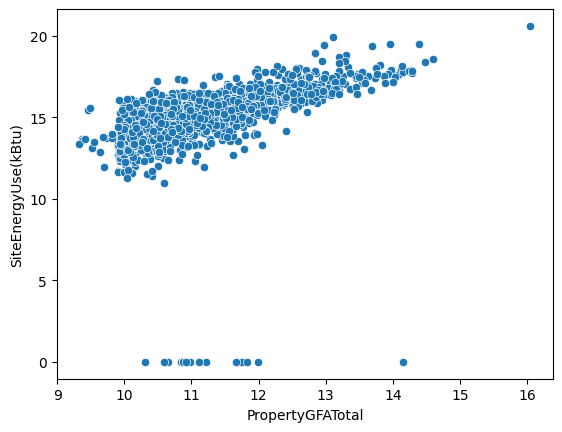

In [90]:
sns.scatterplot(x=np.log1p(df['PropertyGFATotal']), y=np.log1p(df['SiteEnergyUse(kBtu)']))

La relation devient assez plus linéaire après transformation logarithmique.

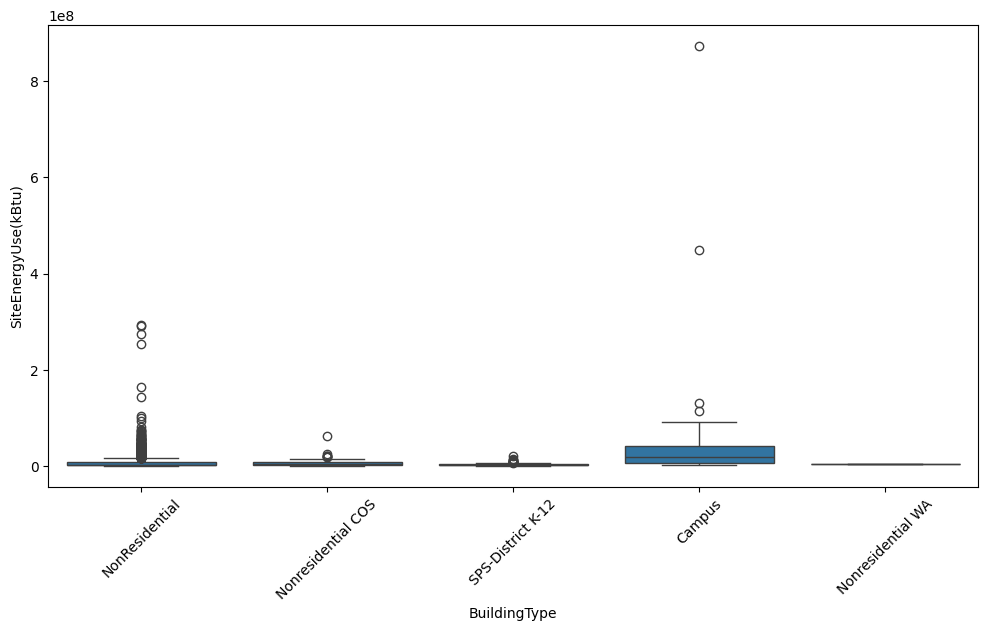

In [91]:
plt.figure(figsize=(12,6))
sns.boxplot(x='BuildingType', y='SiteEnergyUse(kBtu)', data=df)
plt.xticks(rotation=45)
plt.show()

Ce graphique nous permet d'identifier quels types consomment le plus et d'observer les outliers par catégorie

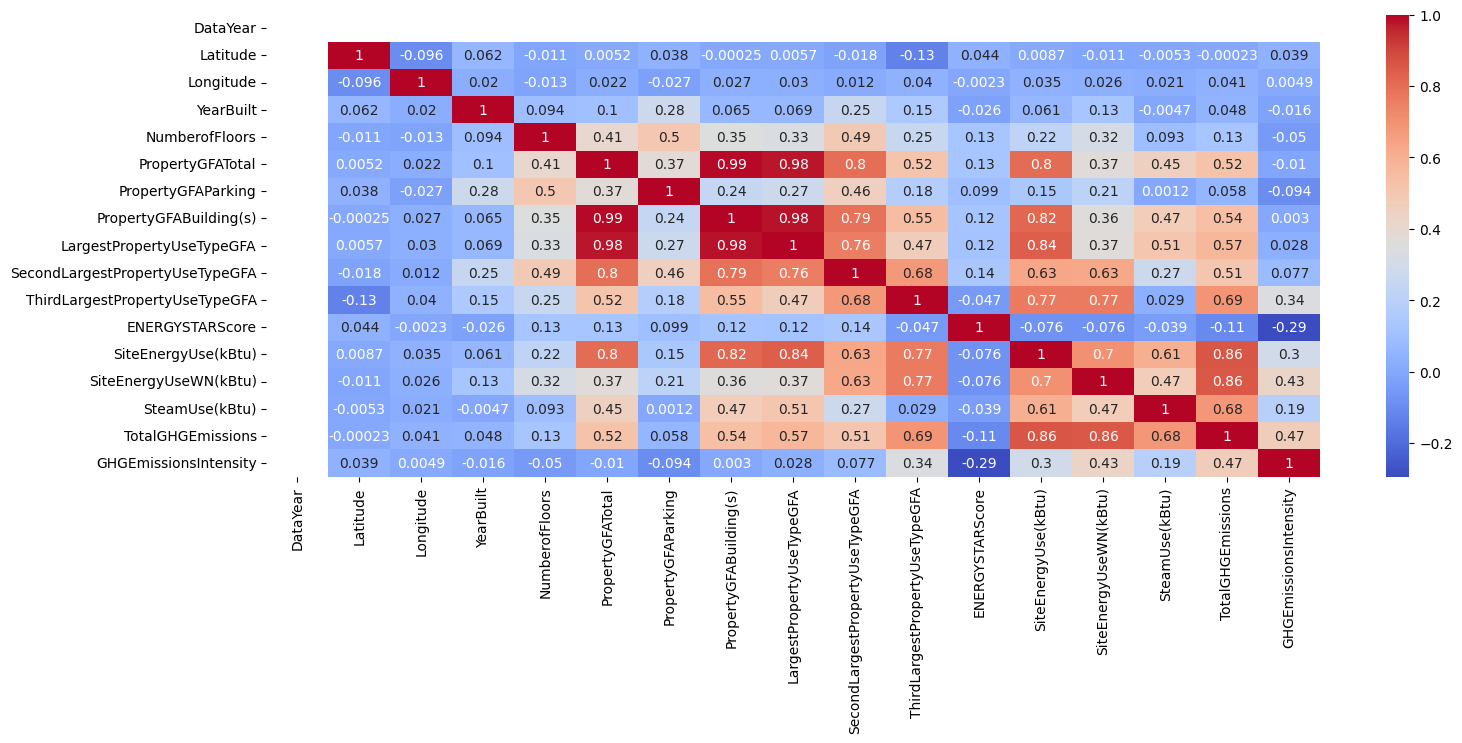

In [92]:
plt.figure(figsize=(17, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

## Construction de nouvelles variables

In [93]:
#Calcul de l'âge du bâtiment
df["built_Age"] = df["DataYear"] - df["YearBuilt"]

# Calcul du ratio des bâtiments
df["building_Ratio"] = df["PropertyGFABuilding(s)"] / df["PropertyGFATotal"]

In [94]:
df = df.drop(["DataYear", "YearBuilt", "PropertyGFABuilding(s)",
              "PropertyGFAParking"], axis=1)

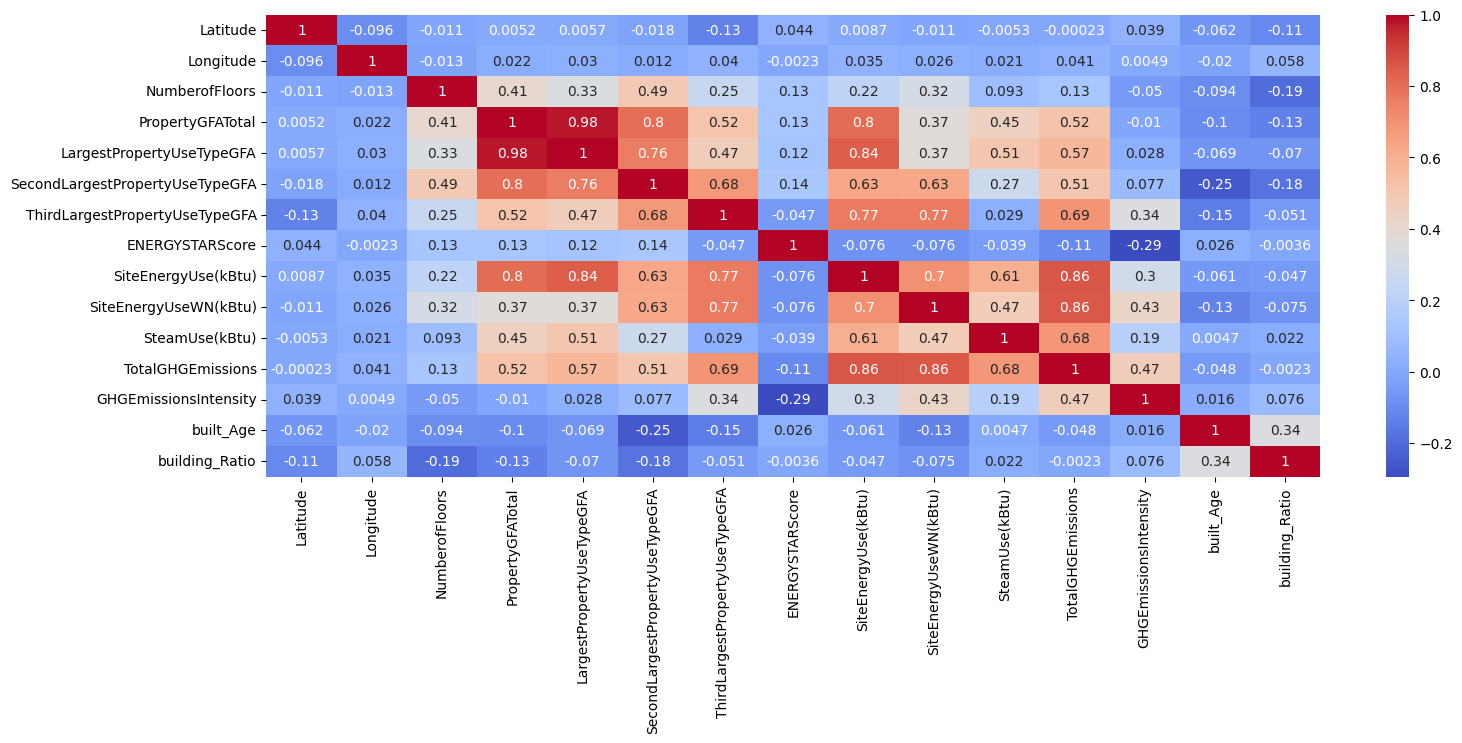

In [95]:
plt.figure(figsize=(17, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [96]:
df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'NumberofFloors', 'PropertyGFATotal',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'SteamUse(kBtu)', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'built_Age', 'building_Ratio'],
      dtype='object')

In [97]:
df = df.drop(["SiteEnergyUseWN(kBtu)", "SteamUse(kBtu)", "LargestPropertyUseType",
              "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType", "Outlier",
              "GHGEmissionsIntensity", "TotalGHGEmissions", "SecondLargestPropertyUseTypeGFA", "Latitude",
              "Longitude", "ThirdLargestPropertyUseTypeGFA", "LargestPropertyUseTypeGFA"], axis=1)

In [98]:
df.shape

(1651, 9)

In [99]:
df.skew(numeric_only=True)

NumberofFloors          6.017033
PropertyGFATotal       19.071492
ENERGYSTARScore        -0.771256
SiteEnergyUse(kBtu)    17.993867
built_Age               0.297669
building_Ratio         -2.473178
dtype: float64

In [100]:
df = df.dropna(subset=['SiteEnergyUse(kBtu)'])

In [101]:
df["NumberofFloors"] = np.log1p(df["NumberofFloors"])
df["PropertyGFATotal"] = np.log1p(df["PropertyGFATotal"])

In [102]:
df.skew(numeric_only=True)

NumberofFloors          1.308621
PropertyGFATotal        1.076810
ENERGYSTARScore        -0.771256
SiteEnergyUse(kBtu)    17.993867
built_Age               0.300525
building_Ratio         -2.471052
dtype: float64

In [103]:
df.shape

(1649, 9)

In [104]:
df.isnull().sum()

BuildingType             0
PrimaryPropertyType      0
Neighborhood             0
NumberofFloors           0
PropertyGFATotal         0
ENERGYSTARScore        566
SiteEnergyUse(kBtu)      0
built_Age                0
building_Ratio           0
dtype: int64

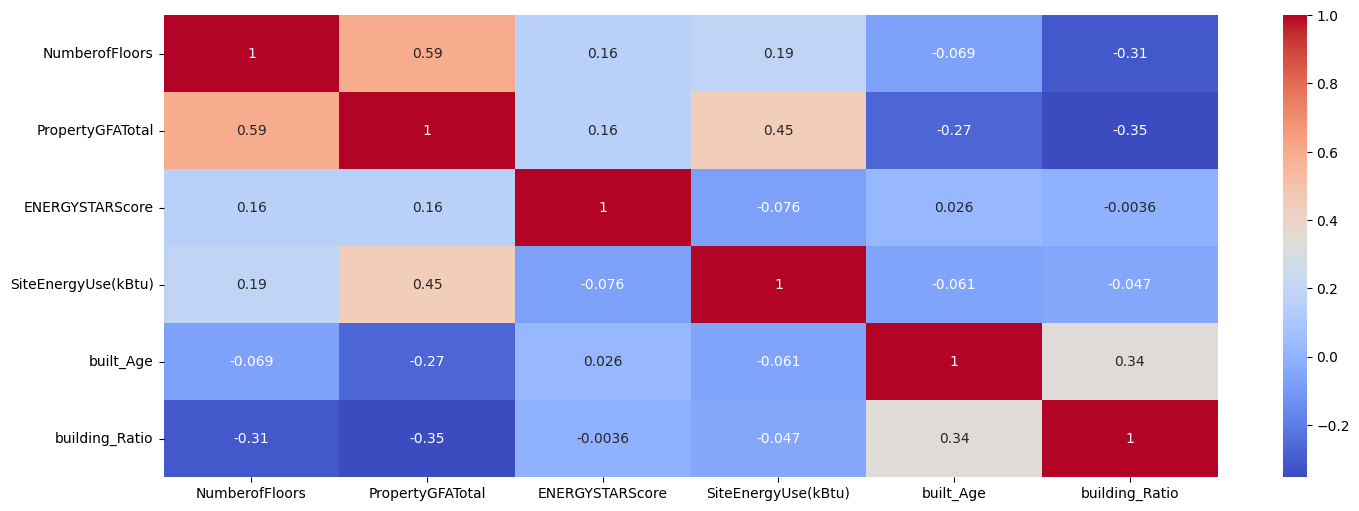

In [105]:
plt.figure(figsize=(17, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [106]:
#sns.pairplot(df)

### Séparation du dataset

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [108]:
y = np.log1p(df["SiteEnergyUse(kBtu)"]) #df["SiteEnergyUse(kBtu)"]
X = df.drop(["SiteEnergyUse(kBtu)"], axis = 1)

In [109]:
y.isnull().sum()

0

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

### Imputations et Pipeline
### Features selection

In [111]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [112]:
from xgboost import XGBRegressor

In [113]:
X.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'NumberofFloors',
       'PropertyGFATotal', 'ENERGYSTARScore', 'built_Age', 'building_Ratio'],
      dtype='object')

In [114]:
num_var = ["NumberofFloors", "PropertyGFATotal", "ENERGYSTARScore",
           "built_Age", "building_Ratio"]

cat_var = ["BuildingType", "PrimaryPropertyType", "Neighborhood"]

In [115]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median'))
])

In [116]:
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [117]:
preprocess = ColumnTransformer(
    transformers = [
        ("num", num_pipeline, num_var),
        ("cat", cat_pipeline, cat_var)
    ]
)

In [118]:
y.shape

(1649,)

In [119]:
model_xgb = Pipeline(steps=[("preprocess", preprocess),
                             ("xgb_model", XGBRegressor(
                                 n_estimators=600,
                                 learning_rate=0.01,
                                 max_depth=4,
                                 subsample=0.8,
                                 colsample_bytree=0.8,
                                 reg_alpha=0.5,
                                 reg_lambda=1.0,
                                 #min_samples_split=10,
                                 #min_samples_leaf=5,
                                 #max_features="sqrt",
                                 random_state=42,
                                 n_jobs=-1
                             ))
])

In [120]:
model_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'ENERGYSTARScore',
                                                   'built_Age',
                                                   'building_Ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Bui...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=600, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [121]:
y_pred = model_xgb.predict(X_test)

In [122]:
y_pred

array([13.895632 , 16.746874 , 14.381972 , 13.818934 , 14.198823 ,
       15.449659 , 13.5564   , 15.1320305, 14.579795 , 14.02376  ,
       15.324976 , 14.3732195, 14.110127 , 15.417751 , 13.856975 ,
       13.844005 , 14.674704 , 15.074267 , 13.781422 , 16.045975 ,
       14.411842 , 14.46927  , 14.180878 , 13.830013 , 14.456337 ,
       14.397174 , 14.573676 , 16.137526 , 13.52078  , 14.064001 ,
       14.1094055, 15.525993 , 15.090344 , 13.957747 , 13.832645 ,
       16.805468 , 15.56924  , 17.411888 , 13.107784 , 13.847017 ,
       15.14862  , 14.870157 , 14.599713 , 15.849431 , 13.725689 ,
       16.827845 , 16.035194 , 13.285933 , 14.728439 , 14.814936 ,
       13.855934 , 14.463686 , 14.248609 , 14.406582 , 13.506226 ,
       14.057144 , 14.503933 , 15.816616 , 13.612738 , 14.766715 ,
       16.755415 , 14.015883 , 14.1690235, 16.864895 , 13.74757  ,
       14.3442135, 14.338675 , 14.088078 , 15.357846 , 14.431499 ,
       15.597311 , 13.297174 , 14.517977 , 17.06497  , 14.0679

In [123]:
model_xgb.score(X_train, y_train)

0.8507734968172699

In [124]:
model_xgb.score(X_test, y_test)

0.6659467763843736

In [125]:
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", np.sqrt(mean_absolute_error(y_test, y_pred)))

R2: 0.6659467763843736
RMSE: 1.143005054058318
MAE: 0.7828239295161014


In [126]:
scores = cross_val_score(model_xgb, X, y, cv=5, scoring="r2")
print(scores)

[0.65206869 0.79033206 0.11594804 0.65651449 0.7257562 ]


In [127]:
print("Mean CV:",scores.mean())
print("Ecart-type:",scores.std())

Mean CV: 0.5881238965832829
Ecart-type: 0.24147341328947544


In [128]:
y_pred_reel = np.expm1(y_pred)
y_test_reel = np.expm1(y_test)

In [129]:
y_test_reel

2559    1.219863e+06
187     6.219718e+07
2691    1.941729e+06
2723    9.870637e+05
2076    1.519952e+06
            ...     
3116    9.290214e+06
2709    1.103595e+06
1641    3.352450e+05
441     2.253017e+07
776     3.377210e+06
Name: SiteEnergyUse(kBtu), Length: 330, dtype: float64

In [130]:
y_pred_reel

array([1.08341738e+06, 1.87531800e+07, 1.76202050e+06, 1.00342875e+06,
       1.46713538e+06, 5.12509250e+06, 7.71736938e+05, 3.73041575e+06,
       2.14745600e+06, 1.23151912e+06, 4.52431050e+06, 1.74666512e+06,
       1.34261088e+06, 4.96414250e+06, 1.04233469e+06, 1.02890294e+06,
       2.36125350e+06, 3.52104050e+06, 9.66484562e+05, 9.30418300e+06,
       1.81544612e+06, 1.92275425e+06, 1.44104200e+06, 1.01460738e+06,
       1.89804775e+06, 1.78901062e+06, 2.13435625e+06, 1.01961980e+07,
       7.44730938e+05, 1.28208762e+06, 1.34164200e+06, 5.53163050e+06,
       3.57810600e+06, 1.15284875e+06, 1.01728150e+06, 1.98848280e+07,
       5.77610100e+06, 3.64659000e+07, 4.92762312e+05, 1.03200731e+06,
       3.79281625e+06, 2.87095950e+06, 2.19065875e+06, 7.64399500e+06,
       9.14093250e+05, 2.03348080e+07, 9.20441900e+06, 5.88852375e+05,
       2.49160825e+06, 2.71671850e+06, 1.04125075e+06, 1.91204800e+06,
       1.54202638e+06, 1.80592112e+06, 7.33970562e+05, 1.27332662e+06,
      